## Task 1: Exploratory Data Analytics
### Data Collection

In [165]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")            #Can include stop words here

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer()
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

# print(matrix)
# print(word_bank)
# print(frequencies)



Unique classes: ['entertainment' 'tech']


### Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [166]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])

print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}\n\n")
    print(word_bank.size)
    
    





Number of articles:  428
Number of features:  13518
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' '

### Task 1 B
#### i) Top 50 Frequency plot

[10567  8917  8257  8516   859  4899 13459  8108 12829  8069 13402  1610
  3158  4962 12634  7939 12285 11013  7552  8399  7494 12090 12603 12835
  7236  7856 13386  3748  7060 12616  5317  8234 12841 11254 13463  9010
  5432 12352  1496 12836 10876  2879     1 13153 12238 13211  7459  8523
   193  5309]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. mobile: 291
17. time: 271
18. show: 271
19. many: 259
20. number: 257
21. make: 253
22. technology: 250
23. tv: 246
24. use: 241
25. like: 239
26. million: 229
27. world: 222
28. digital: 221
29. last: 220
30. two: 217
31. games: 216
32. net: 216
33. users: 214
34. software: 213
35. years: 212
36. phone: 200
37. get: 198
38. top: 195
39. bbc: 189
40. used: 183
41. service: 180
42. computer: 180
43. 000: 179
44. way: 178
45. three: 173
46. well: 172
47. made: 169
4

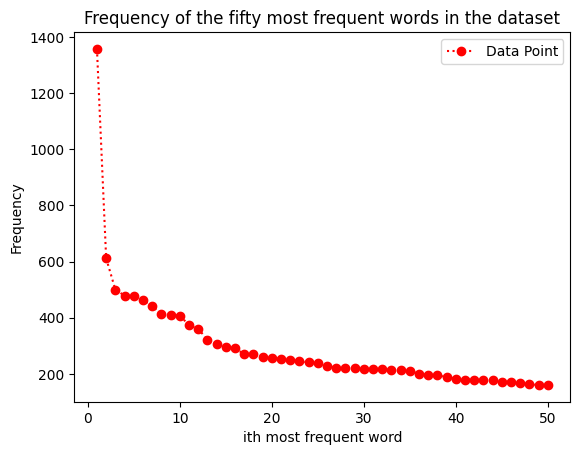

In [167]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

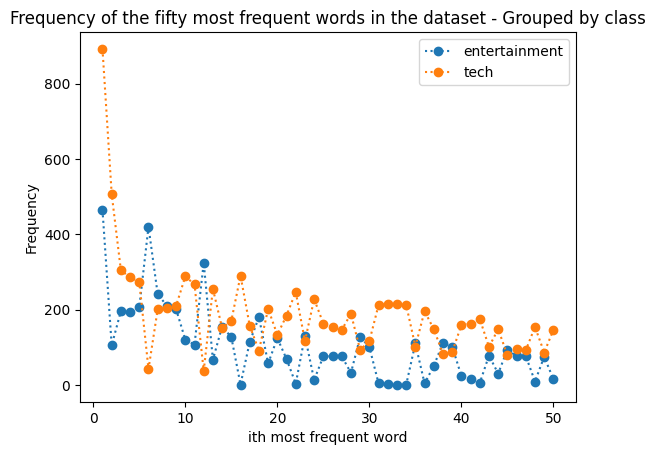

In [168]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

216 212


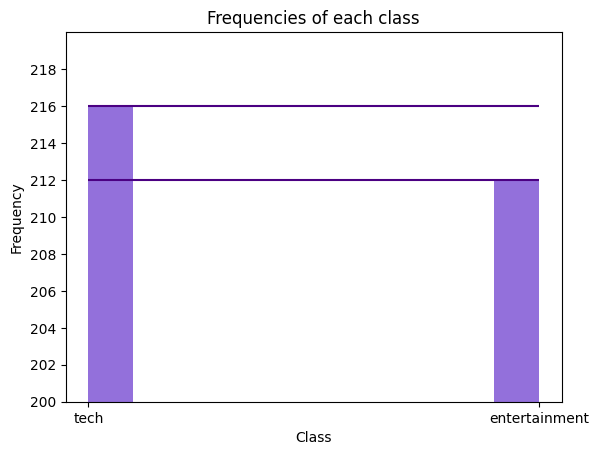

In [169]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print(np.count_nonzero(y[y == "tech"]), np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()
 

In [170]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()


## Task 2: Classification Models Learning
### Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [171]:
# code for task 2 a/i

#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [172]:
# code for task 2 a/ii

### Task 2 B
#### K-Nearest Neighbours Classifier
#### Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

In [173]:
# code for task 2 b
# for surface plots check note on assignment pdf at bottom of task 2

### Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

In [174]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter

In [ ]:
# code for task 2 C hard margin rbf kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create hard margin rbf SVM, high C for hard margin
# gamma is kernel width, auto sets to 1/# of features
rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf.fit(X, y)
pred_y = rbf.predict(test_X)

# temporary accuracy calculation
accuracy = accuracy_score(test_y, pred_y, normalize=True)
print(f"Hard margin RBF kernel SVM accuracy on test set: %{accuracy * 100:.0f}")



Hard margin RBF kernel SVM accuracy on test set: %100.00


### Task 2 D
#### Neural Network
#### add more details later

In [176]:
# code for task 2 D neural network